<a href="https://colab.research.google.com/github/pimentad2020/DSWP/blob/master/FIOT_Aprendizado_de_M%C3%A1quina_(PyCaret).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Máquina (PyCaret)

Há diversas maneiras de praticar o aprendizado de máquina:
* Temos muitos dados abertos, muitas APIs que fornecem dados atualizados, e muitos datasets;
* Temos muitas plataformas online para processar esses dados sem necessidade de ter um supercomputador em casa;
* Temos muitas linguagens para programar todo o processo de aprendizado e integrar os dados com o processamento dos mesmos.

No entanto, para quem está iniciando, uma motivação pode ser o contato com casos mais fáceis de se entender e sem muito código. 

Neste caso, vamos utilizar a biblioteca PyCaret com alguns exemplos simples seguindo um passo a passo curto e lento.

Obs.: Como teremos alguns termos que podem dificultar a leitura, deixamos um Glossário no fim do arquivo para consulta.

# Iniciação com PyCaret

Vamos utilizar esta biblioteca que facilita todo nosso serviço pesado sem nos dar muita dor de cabeça. Esta biblioteca também realiza vários testes para nós sem que precisemos pensar muito, ou escrever muitas linhas de código.

# Nova seção

In [2]:
# Instalar PyCaret
!pip install pycaret

     |████████████████████████████████| 256kB 6.5MB/s 
     |████████████████████████████████| 102kB 6.0MB/s 
     |████████████████████████████████| 245kB 9.3MB/s 
     |████████████████████████████████| 14.2MB 329kB/s 
     |████████████████████████████████| 276kB 49.4MB/s 
     |████████████████████████████████| 65.8MB 58kB/s 
     |████████████████████████████████| 6.8MB 43.9MB/s 
     |████████████████████████████████| 157.5MB 80kB/s 
     |████████████████████████████████| 174kB 49.6MB/s 
     |████████████████████████████████| 1.6MB 40.5MB/s 
     |████████████████████████████████| 1.8MB 40.8MB/s 
     |████████████████████████████████| 2.1MB 29.7MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 604kB 38.8MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 3.1MB 42.0MB/s 
     |████████████████████████████████| 153kB 48.5MB/s 
 

## PyCaret pra aprendizado supervisionado (Regressão)

Vamos iniciar com um banco de dados que relaciona gastos de um plano de saúde com seus beneficiários e alguns atributos que podem impactar nesses gastos, como idade e sexo.
Neste caso, iremos utilizar estes dados para criar um modelo que preverá os custos de um beneficiário que não esteja nesta base.

In [3]:
# Carregar bibliotecas
import numpy as np
import pandas as pd
import pycaret
from pycaret import regression as pyreg
from pycaret.utils import enable_colab
from sklearn.model_selection import train_test_split

In [4]:
# Carregar dados
URL = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv' 
# CSV - Comma Separated Values - Valores Separados por Vírgula
df = pd.read_csv(URL) # DataFrame
df.shape

(1338, 7)

In [5]:
# Ver informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Separar banco de dados (treino e teste)
train, validation = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
validation

,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9095.068250
887,36,female,30.020,0,no,northwest,5272.175800
890,64,female,26.885,0,yes,northwest,29330.983150
1293,46,male,25.745,3,no,northwest,9301.893550
259,19,male,31.920,0,yes,northwest,33750.291800
1312,34,male,42.900,1,no,southwest,4536.259000
899,19,female,22.515,0,no,northwest,2117.338850
752,64,male,37.905,0,no,northwest,14210.535950
1286,28,female,17.290,0,no,northeast,3732.625100
707,49,male,28.690,3,no,northwest,10264.442100


In [8]:
train

,age,sex,bmi,children,smoker,region,charges
560,46,female,19.950,2,no,northwest,9193.83850
1285,47,female,24.320,0,no,northeast,8534.67180
1142,52,female,24.860,0,no,southeast,27117.99378
969,39,female,34.320,5,no,southeast,8596.82780
486,54,female,21.470,3,no,northwest,12475.35130
...,...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast,4561.18850
1130,39,female,23.870,5,no,southeast,8582.30230
1294,58,male,25.175,0,no,northeast,11931.12525
860,37,female,47.600,2,yes,southwest,46113.51100


In [9]:
# Preparar dados para regressão
# - https://pycaret.org/regression/
reg = pyreg.setup(data = train, 
              target = 'charges', 
              train_size = 0.7)

,Description,Value
0,session_id,211
1,Target,charges
2,Original Data,"(1070, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(748, 14)"


In [10]:
# Treinar modelos
pyreg.compare_models()
# compare_models(blacklist = None, fold = 10,  round = 4,  sort = ‘R2’, turbo = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2586.9517,2.136933e+07,4519.2558,0.8468,0.4440,0.3125,0.074
catboost,CatBoost Regressor,2740.1228,2.294455e+07,4709.6351,0.8338,0.4789,0.3458,0.732
rf,Random Forest Regressor,2682.6470,2.313702e+07,4731.4321,0.8332,0.4750,0.3450,0.504
lightgbm,Light Gradient Boosting Machine,2905.4056,2.361611e+07,4783.3640,0.8301,0.5156,0.3764,0.051
et,Extra Trees Regressor,2658.0759,2.569963e+07,4959.3348,0.8161,0.4683,0.3081,0.455
ada,AdaBoost Regressor,3977.9367,2.657913e+07,5102.0433,0.8074,0.6231,0.7010,0.027
xgboost,Extreme Gradient Boosting,3072.4131,2.795548e+07,5238.1094,0.7968,0.5500,0.4095,0.578
llar,Lasso Least Angle Regression,4242.5501,3.803479e+07,6118.9298,0.7214,0.5787,0.4268,0.014
ridge,Ridge Regression,4261.0029,3.805532e+07,6121.5357,0.7214,0.5882,0.4300,0.013
br,Bayesian Ridge,4259.4482,3.806590e+07,6122.3145,0.7213,0.5928,0.4295,0.013


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=211, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# Criar Modelo
# - Siglas dos modelos: https://pycaret.org/regression/#create-model
xgboost_tuned = pyreg.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3490.8723,2.914476e+07,5398.5889,0.8068,0.6927,0.7761
1,2482.6584,1.437771e+07,3791.7957,0.8193,0.4103,0.3724
2,2538.5430,1.791338e+07,4232.4204,0.8830,0.5021,0.3310
3,3207.7773,3.607584e+07,6006.3164,0.7678,0.4631,0.3560
4,2934.5896,2.234213e+07,4726.7461,0.8372,0.4336,0.3752
5,3585.6479,3.655533e+07,6046.1001,0.7727,0.6845,0.5233
6,3178.9568,3.224753e+07,5678.6914,0.7292,0.4249,0.2889
7,2952.0222,2.948828e+07,5430.3110,0.8046,0.6201,0.3032
8,3268.1926,3.359148e+07,5795.8159,0.6954,0.6197,0.3373
9,3084.8706,2.781832e+07,5274.3076,0.8521,0.6490,0.4310


In [12]:
# Ver parâmetros do melhor modelo
print(xgboost_tuned)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=211, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)


In [13]:
# Avaliar parâmetros
pyreg.plot_model(xgboost_tuned, plot='parameter')

,Parameters
objective,reg:squarederror
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
gpu_id,-1
importance_type,gain
interaction_constraints,


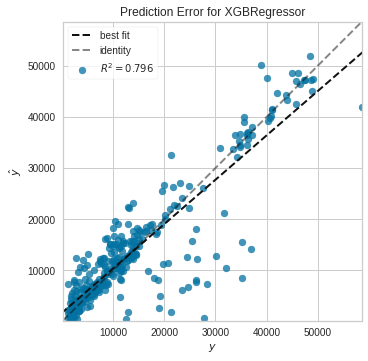

In [14]:
# Comparar predições e resultados do banco de teste
pyreg.plot_model(xgboost_tuned, plot='error')

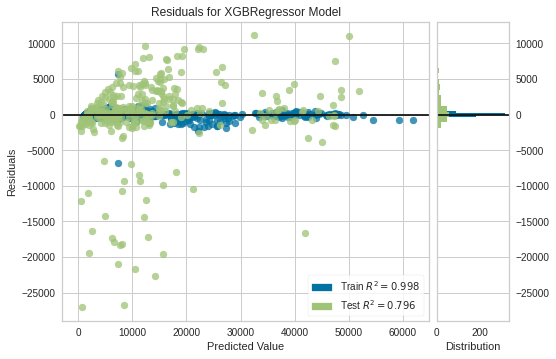

In [15]:
# Comparar os resíduos
pyreg.plot_model(xgboost_tuned, plot='residuals')

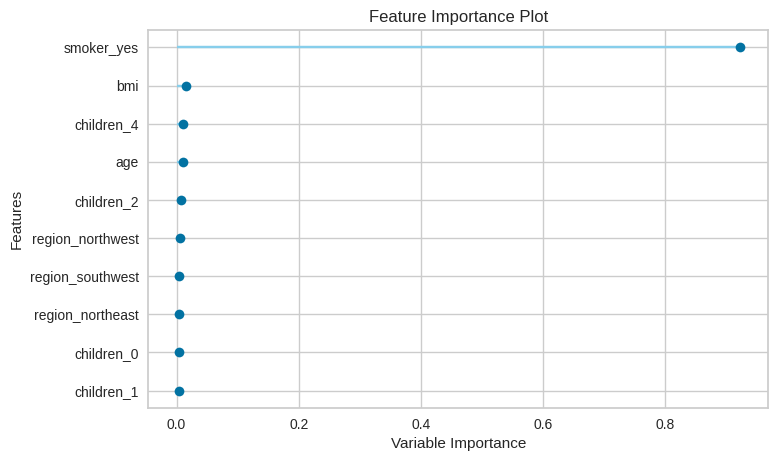

In [16]:
# Verificar importância das variáveis
pyreg.plot_model(xgboost_tuned, 'feature')

In [17]:
xgboost_tuned_holdout = pyreg.predict_model(xgboost_tuned, data=validation)
xgboost_tuned_holdout

,age,sex,bmi,children,smoker,region,charges,Label
764,45,female,25.175,2,no,northeast,9095.06825,10444.858398
887,36,female,30.020,0,no,northwest,5272.17580,7714.335449
890,64,female,26.885,0,yes,northwest,29330.98315,30672.744141
1293,46,male,25.745,3,no,northwest,9301.89355,11701.676758
259,19,male,31.920,0,yes,northwest,33750.29180,34310.621094
...,...,...,...,...,...,...,...,...
109,63,male,35.090,0,yes,southeast,47055.53210,45234.097656
575,58,female,27.170,0,no,northwest,12222.89830,12398.516602
535,38,male,28.025,1,no,northeast,6067.12675,6516.217773
543,54,female,47.410,0,yes,southeast,63770.42801,47089.425781


In [18]:
# Finalizando o modelo
final_xgboost_tuned = pyreg.finalize_model(xgboost_tuned)

In [19]:
# Salvando o modelo
pyreg.save_model(final_xgboost_tuned, 'snf_saved_04072020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                         

Abaixo segue o código completo:

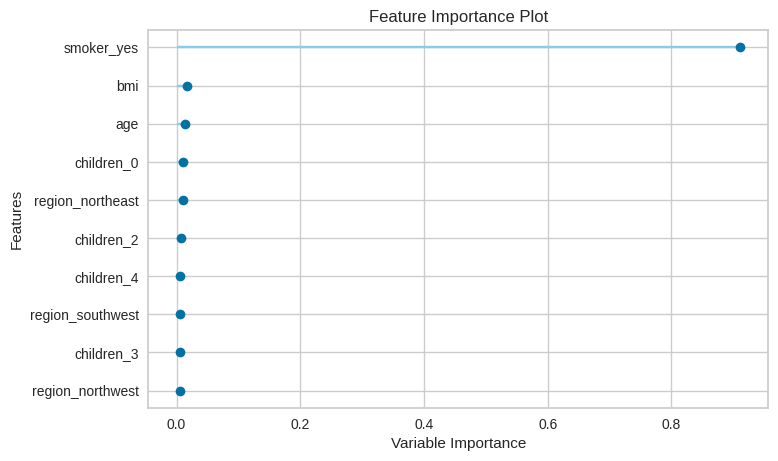

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                         

In [20]:
# Instalar PyCaret
!pip install pycaret
# Carregar bibliotecas
import numpy as np
import pandas as pd
import pycaret
from pycaret import regression as pyreg
from pycaret.utils import enable_colab
from sklearn.model_selection import train_test_split
# Carregar dados
URL = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv' 
# CSV - Comma Separated Values - Valores Separados por Vírgula
df = pd.read_csv(URL) # DataFrame
df.shape
# Ver informações dos dados
df.info()
# Separar banco de dados (treino e teste)
train, validation = train_test_split(df, test_size=0.2, random_state=42)
validation
train
# Preparar dados para regressão
# - https://pycaret.org/regression/
reg = pyreg.setup(data = train, 
              target = 'charges', 
              train_size = 0.7)
# Treinar modelos
pyreg.compare_models()
# compare_models(blacklist = None, fold = 10,  round = 4,  sort = ‘R2’, turbo = True)
# Criar Modelo
# - Siglas dos modelos: https://pycaret.org/regression/#create-model
xgboost_tuned = pyreg.create_model('xgboost')
# Ver parâmetros do melhor modelo
print(xgboost_tuned)
# Avaliar parâmetros
pyreg.plot_model(xgboost_tuned, plot='parameter')
# Comparar predições e resultados do banco de teste
pyreg.plot_model(xgboost_tuned, plot='error')
# Comparar os resíduos
pyreg.plot_model(xgboost_tuned, plot='residuals')
# Verificar importância das variáveis
pyreg.plot_model(xgboost_tuned, 'feature')
xgboost_tuned_holdout = pyreg.predict_model(xgboost_tuned, data=validation)
xgboost_tuned_holdout
# Finalizando o modelo
final_xgboost_tuned = pyreg.finalize_model(xgboost_tuned)
# Salvando o modelo
pyreg.save_model(final_xgboost_tuned, 'snf_saved_04072020')

Referências:
* https://github.com/zetta-health/exp-curso-python-saude/
* https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763
* https://colab.research.google.com/github/henriquepgomide/blog-youtube-tutorials/blob/master/notebooks/Pycaret%3A_aprendizagem_de_maquinas_para_quem_tem_prazo.ipynb#scrollTo=Q63KqMs734_p

## PyCaret para aprendizado supervisionado (Classificação)

No exemplo anterior, utilizamos um aprendizado de máquina com Regressão. Agora vamos ver um exemplo com Classificação.

Neste caso, o banco de dados apresenta informações sobre empregados de uma empresa. Vamos usar estes dados para predizer a possibilidade de um funcionário deixar a exmpresa.

Há vários outros bancos de dados disponíveis através da própria biblioteca:
- https://pycaret.org/get-data/

In [21]:
# Instalando a biblioteca (caso não tenha feito isso anteriormente)
# !pip install pycaret

In [22]:
# Importando bibliotecas
from pycaret import classification as pyclass

In [23]:
# Importando um banco de dados
from pycaret.datasets import get_data
dataset = get_data('employee')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [24]:
# Agora vamos separar os dados
data_seen = dataset.sample(frac=0.95, random_state=780).reset_index(drop=True)
data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)
dataset = dataset.drop(['department','average_montly_hours'],axis=1)
print('Dados para treino: ' + str(data_seen.shape))
print('Dados para testes: ' + str(data_unseen.shape))

Dados para treino: (14249, 10)
Dados para testes: (750, 10)


In [25]:
# Preparando os dados para Classificação
# - http://pycaret.org/classification/
setting_up = pyclass.setup(data = data_seen, target = 'left', session_id=123)

,Description,Value
0,session_id,123
1,Target,left
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14249, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
# Treinar modelos
pyclass.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9875,0.9910,0.9566,0.9905,0.9732,0.9650,0.9653,0.880
xgboost,Extreme Gradient Boosting,0.9850,0.9921,0.9562,0.9802,0.9680,0.9582,0.9584,7.497
lightgbm,Light Gradient Boosting Machine,0.9843,0.9928,0.9528,0.9807,0.9665,0.9562,0.9564,0.168
et,Extra Trees Classifier,0.9816,0.9907,0.9549,0.9674,0.9610,0.9489,0.9491,0.846
catboost,CatBoost Classifier,0.9815,0.9919,0.9444,0.9770,0.9604,0.9483,0.9486,4.440
gbc,Gradient Boosting Classifier,0.9744,0.9878,0.9255,0.9659,0.9452,0.9285,0.9289,0.844
dt,Decision Tree Classifier,0.9734,0.9687,0.9596,0.9314,0.9451,0.9276,0.9279,0.060
ada,Ada Boost Classifier,0.9587,0.9817,0.9044,0.9208,0.9124,0.8854,0.8856,0.332
knn,K Neighbors Classifier,0.9344,0.9674,0.8994,0.8379,0.8673,0.8239,0.8250,0.170
lr,Logistic Regression,0.8986,0.9382,0.8030,0.7785,0.7903,0.7235,0.7238,0.544


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [27]:
# Criar modelo como Random Forest
# - http://pycaret.org/classification/#create-model
# rf = create_model('rf')
lightgbm = pyclass.create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9860,0.9959,0.9664,0.9746,0.9705,0.9613,0.9613
1,0.9850,0.9921,0.9580,0.9785,0.9682,0.9583,0.9584
2,0.9830,0.9937,0.9538,0.9742,0.9639,0.9528,0.9529
3,0.9850,0.9947,0.9664,0.9705,0.9684,0.9586,0.9586
4,0.9829,0.9954,0.9620,0.9661,0.9641,0.9529,0.9529
5,0.9809,0.9938,0.9367,0.9823,0.9590,0.9466,0.9470
6,0.9799,0.9894,0.9283,0.9865,0.9565,0.9435,0.9442
7,0.9890,0.9960,0.9536,1.0000,0.9762,0.9691,0.9695
8,0.9870,0.9871,0.9538,0.9913,0.9722,0.9637,0.9640
9,0.9840,0.9899,0.9496,0.9826,0.9658,0.9553,0.9556


In [28]:
# Com o modelo criado, vamos aprimorar os hiperparâmetros do modelo
tuned_model = pyclass.tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9840,0.9890,0.9706,0.9625,0.9665,0.9560,0.9560
1,0.9790,0.9854,0.9580,0.9540,0.9560,0.9422,0.9422
2,0.9820,0.9936,0.9706,0.9545,0.9625,0.9506,0.9507
3,0.9800,0.9909,0.9832,0.9360,0.9590,0.9458,0.9463
4,0.9789,0.9875,0.9536,0.9576,0.9556,0.9418,0.9418
5,0.9749,0.9922,0.9241,0.9690,0.9460,0.9297,0.9301
6,0.9749,0.9868,0.9198,0.9732,0.9458,0.9295,0.9301
7,0.9819,0.9967,0.9662,0.9582,0.9622,0.9503,0.9503
8,0.9829,0.9868,0.9580,0.9702,0.9641,0.9529,0.9529
9,0.9840,0.9848,0.9580,0.9744,0.9661,0.9556,0.9556


In [29]:
# Finalizando o modelo
final = pyclass.finalize_model(tuned_model)

In [30]:
# Realizando predições
unseen_predictions = pyclass.predict_model(final, data=data_unseen)
unseen_predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,Label,Score
0,0.11,0.89,6,306,4,0,0,technical,low,1,1,1.0000
1,0.41,0.54,2,152,3,0,0,technical,low,1,1,1.0000
2,0.87,0.88,5,269,5,0,0,technical,low,1,1,0.9980
3,0.45,0.48,2,158,3,0,0,technical,low,1,1,1.0000
4,0.40,0.46,2,127,3,0,0,technical,low,1,1,0.9999


In [31]:
# Salvando o modelo
pyclass.save_model(final,'Final_model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.429,
                                 max_depth=-1, min_child_samples=70,
                                 min_child_weight

Abaixo segue o código completo:

In [32]:
# Instalando a biblioteca (caso não tenha feito isso anteriormente)
!pip install pycaret
# Importando bibliotecas
from pycaret import classification as pyclass
# Importando um banco de dados
from pycaret.datasets import get_data
dataset = get_data('employee')
# Agora vamos separar os dados
data_seen = dataset.sample(frac=0.95, random_state=780).reset_index(drop=True)
data_unseen = dataset.drop(data_seen.index).reset_index(drop=True)
dataset = dataset.drop(['department','average_montly_hours'],axis=1)
print('Dados para treino: ' + str(data_seen.shape))
print('Dados para testes: ' + str(data_unseen.shape))
# Preparando os dados para Classificação
# - http://pycaret.org/classification/
setting_up = pyclass.setup(data = data_seen, target = 'left', session_id=123)
# Treinar modelos
pyclass.compare_models()
# Criar modelo como Random Forest
# - http://pycaret.org/classification/#create-model
# rf = create_model('rf')
lightgbm = pyclass.create_model('lightgbm')
# Com o modelo criado, vamos aprimorar os hiperparâmetros do modelo
tuned_model = pyclass.tune_model(lightgbm)
# Finalizando o modelo
final = pyclass.finalize_model(tuned_model)
# Realizando predições
unseen_predictions = pyclass.predict_model(final, data=data_unseen)
unseen_predictions.head()
# Salvando o modelo
pyclass.save_model(final,'Final_model')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9840,0.9890,0.9706,0.9625,0.9665,0.9560,0.9560
1,0.9790,0.9854,0.9580,0.9540,0.9560,0.9422,0.9422
2,0.9820,0.9936,0.9706,0.9545,0.9625,0.9506,0.9507
3,0.9800,0.9909,0.9832,0.9360,0.9590,0.9458,0.9463
4,0.9789,0.9875,0.9536,0.9576,0.9556,0.9418,0.9418
5,0.9749,0.9922,0.9241,0.9690,0.9460,0.9297,0.9301
6,0.9749,0.9868,0.9198,0.9732,0.9458,0.9295,0.9301
7,0.9819,0.9967,0.9662,0.9582,0.9622,0.9503,0.9503
8,0.9829,0.9868,0.9580,0.9702,0.9641,0.9529,0.9529
9,0.9840,0.9848,0.9580,0.9744,0.9661,0.9556,0.9556


Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.429,
                                 max_depth=-1, min_child_samples=70,
                                 min_child_weight

Referências

- https://analyticsindiamag.com/guide-to-building-and-deploying-ml-web-applications-using-pycaret-streamlit-and-heroku/

# Glossário

- **Modelo**: É algo que é utilizado como referência para comparação com novos elementos. Pode ser uma estrutura de dados qualquer ou um conjunto de parâmetros. É definido após o treinamento e experimentos. 
 - #ExemploForaDaCaixa: Nós já comemos vários alimentos diferentes na vida e temos vários parâmetros que guardamos conosco para avaliar se vamos gostar ou não de algo novo que nos é apresentado. A partir destes parâmetros temos grande chance de saber de antemão se vamos gostar ou não. No entanto, é bom lembrar que podemos errar na nossa avaliação do desconhecido.

- **Conjunto de dados de treinamento**: Amostras de dados utilizadas para ajustar o modelo. É recomendável utilizar dados reais para que, durante o processo de modelagem, o modelo seja criado a partir do que é visto e aprendido por meio das amostras.
  - #ExemploForaDaCaixa: Os primeiros pratos de comida que nos são dados por nossos pais nos ajudam a aprender o que gostamos e o que não gostamos, além de aperfeiçoar nosso modelo para avaliações futuras.

- **Conjunto de dados de validação**: Amostra de dados utilizada para fornecer uma avaliação imparcial (não enviesada) de ajustes realizados nos hiperparâmetros do modelo após a fase de treinamento.
 - #ExemploForaDaCaixa: Agora que já treinamos nosso modelo em casa, vamos provar alguns novos exemplos para ajustar alguns hiperparâmetros (nível de sal ou açúcar) antes de irmos testar o modelo na vida real.

- **Conjunto de dados de teste**: Amostra de dados utilizada para realizar uma avaliação imparcial (não enviesada) dos ajustes realizados no modelo final após treinamento e validação.
 - #ExemploForaDaCaixa: Agora nós vamos para um restaurante, olhamos o cardápio, e decidimos o que iremos comer para avaliar se nosso modelo de comida gostosa está bem preparado para a vida real.

- **Imparcialidade**: Característica importante para a criação de modelos que implica na separação das amostras dos conjuntos de treinamento, validação e teste sem sobreposição para não enviesar a modelagem.
 - #ExemploForaDaCaixa: Quando você pede para uma pessoa avaliar um prato de comida feito por ela mesma, esta pessoa geralmente diz "eu sou suspeita para avaliar", pois esta pessoa dificilmente será imparcial já que foi provando o prato enquanto o fazia (seja pelo olhar, olfato, ou mesmo o paladar). Sendo assim, para existir imparcialidade, é preciso que você prove a mesma comida em diversas ocasiões, pois provavelmente a mesma amostra vai ter o mesmo resultado.

- **Hiperparâmetro**: São parâmetros que são definidos antes do processo de aprendizado. Em contraste, os outros parâmetros do aprendizado são derivados do próprio processo.
  - #ExemploForaDaCaixa: Você define de antemão que não gosta de doces. Começa a provar algumas receitas ou frutas, e a partir daí percebe que você até gosta de um laranja, reconhece que a laranja é doce, e redefine seu hiperparâmetro para um nível pequeno ou um tipo específico de doce.